In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
from data_analysis import run_tsne, plot_tsne

In [3]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [13]:
data_source = 'C:/Users/BiSBII/Documents/MM_ML/data/'

In [5]:
dataset_file = os.path.join(data_source, 'fluxomics_fva.csv')
metadata_file = os.path.join(data_source, 'GSE98923_metadata.xlsx')

In [6]:
data = pd.read_csv(dataset_file, index_col=0)
metadata = pd.read_excel(metadata_file, index_col=0, sheet_name='NO_REPLICATES')

In [7]:
data = data.transpose()
data.shape

(73, 8632)

In [8]:
data = data.fillna(0)

In [9]:
y_state = metadata['state']
y_cv = metadata['cultivar']
y_year = metadata['year']

mature    49
green     24
Name: state, dtype: int64


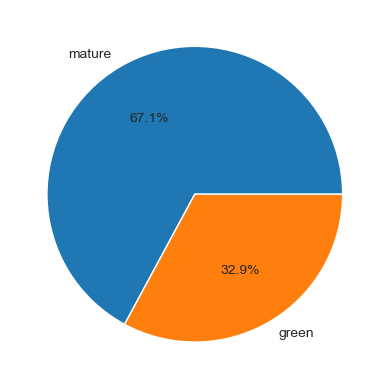

In [35]:
values = y_state.value_counts()
print(values)

plt.pie(values , labels = values.index, autopct='%1.1f%%')
# plt.savefig('pie_state.png')
plt.show()

Cabernet Sauvignon    40
Pinot Noir            33
Name: cultivar, dtype: int64


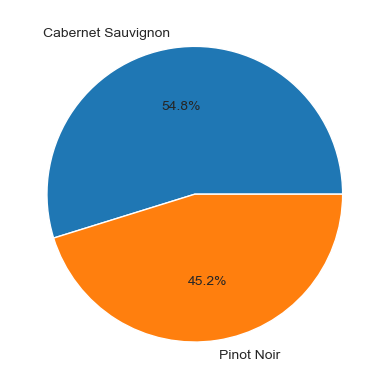

In [36]:
values = y_cv.value_counts()
print(values)

plt.pie(values , labels = values.index, autopct='%1.1f%%')
# plt.savefig('pie_cv.png')
plt.show()

2013    25
2014    25
2012    23
Name: year, dtype: int64


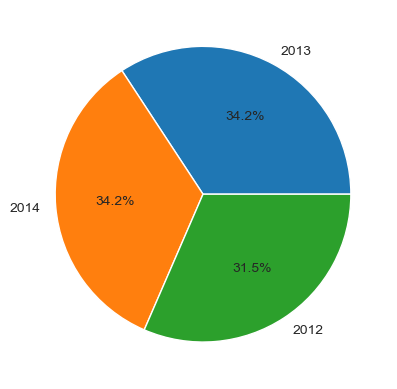

In [37]:
values = y_year.value_counts()
print(values)

plt.pie(values , labels = values.index, autopct='%1.1f%%')
# plt.savefig('pie_year.png')
plt.show()

In [10]:
vt = VarianceThreshold(0)
data_filtered = vt.fit_transform(data)
cols_inds = vt.get_support(indices=True)
df_data_filtered = pd.DataFrame(data_filtered, index=data.index, columns=data.columns[cols_inds])
df_data_filtered.shape

(73, 2241)

In [11]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_data_filtered)
df_data_scaled = pd.DataFrame(data_scaled, columns=df_data_filtered.columns,
                              index=df_data_filtered.index)
df_data_scaled.shape

(73, 2241)

In [40]:
df_tsne = run_tsne(n_components=2, data=df_data_scaled)

In [41]:
df_tsne['factor'] = y_state

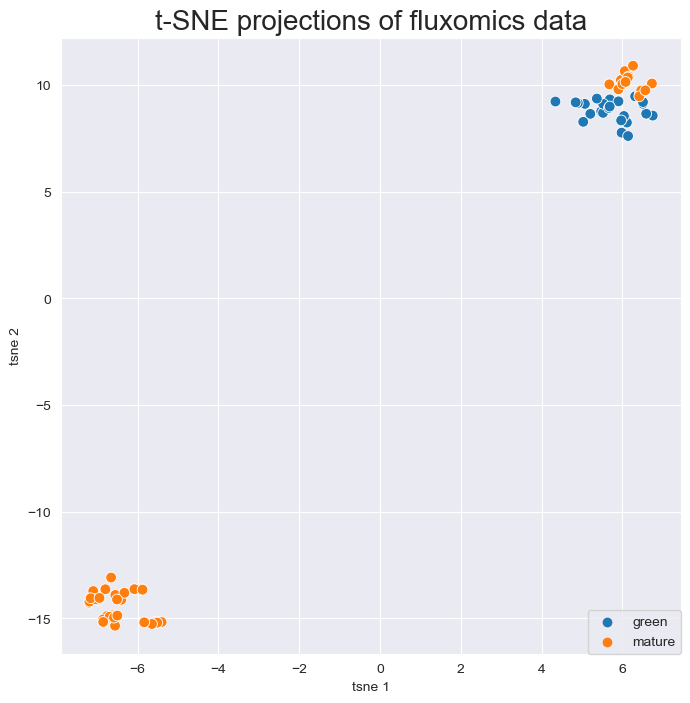

In [42]:
plot_tsne(data=df_tsne, name_fig='tsne_fluxes_state_fva', title='t-SNE projections of fluxomics data')

In [43]:
df_tsne['factor'] = y_cv

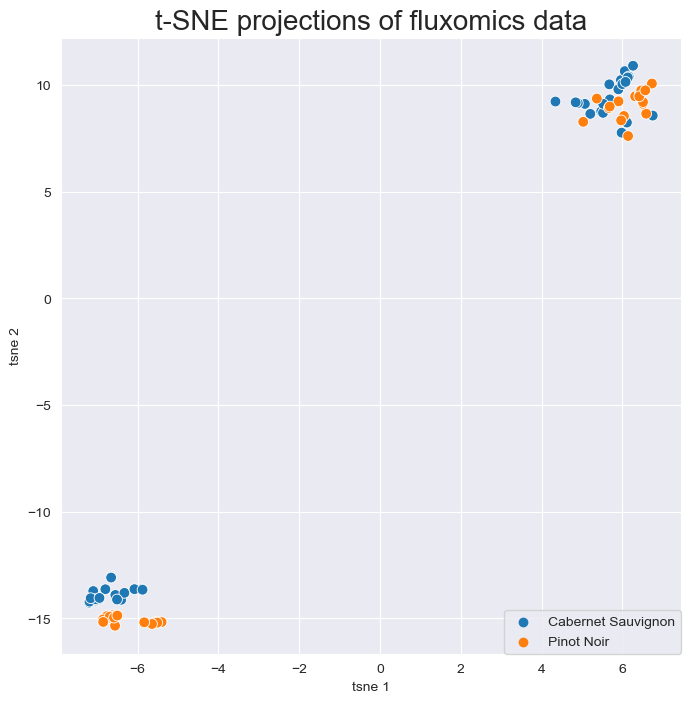

In [44]:
plot_tsne(data=df_tsne, name_fig='tsne_fluxes_cv_fva', title='t-SNE projections of fluxomics data')

# APPLY ML TO PREDICT LABEL STATE

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_data_filtered, y_state, test_size=0.20, random_state=42)

In [46]:
y_test

MEAN SAMPLES
CS_time4_2012     mature
PN_time2_2014      green
CS_time5_2013     mature
CS_time0_2012      green
CS_time1_2014      green
PN_time11_2014    mature
CS_time10_2012    mature
CS_time7_2014     mature
CS_time12_2012    mature
PN_time5_2013     mature
PN_time4_2014     mature
CS_time4_2014     mature
CS_time9_2012     mature
PN_time5_2012     mature
CS_time5_2012     mature
CS_time9_2013     mature
PN_time7_2013     mature
PN_time0_2013      green
CS_time6_2014     mature
CS_time12_2014    mature
PN_time9_2014     mature
CS_time3_2013      green
Name: state, dtype: object

In [17]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(data_scaled, columns=X_train.columns,
                              index=X_train.index)
X_train_scaled.shape

(58, 2241)

In [18]:
test = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(test, columns=X_test.columns,
                              index=X_test.index)
X_test_scaled.shape

(15, 2241)

In [20]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Precision: %0.2f' % precision_score(y_test, y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, y_pred))

Precision: 0.38
Recall: 0.40
Accuracy: 0.40


C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


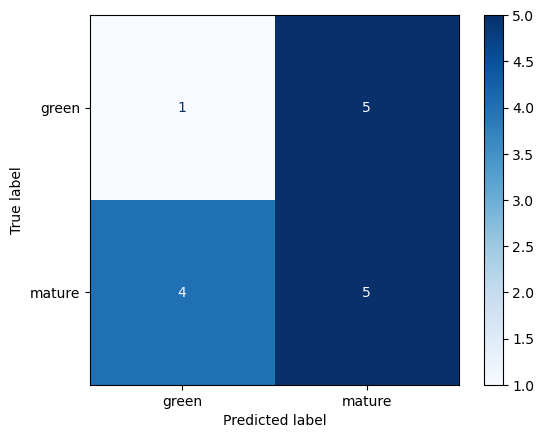

In [21]:
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=clf.classes_, cmap='Blues')
cm

In [22]:
from sklearn import svm

In [24]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

svm_y_pred = svm_model.predict(X_test)

print('PECC (Accuracy): %0.2f' % svm_model.score(X_test, y_test))

print('Precision: %0.2f' % precision_score(y_test, svm_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, svm_y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, svm_y_pred))

PECC (Accuracy): 0.60
Precision: 0.36
Recall: 0.60
Accuracy: 0.60


C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


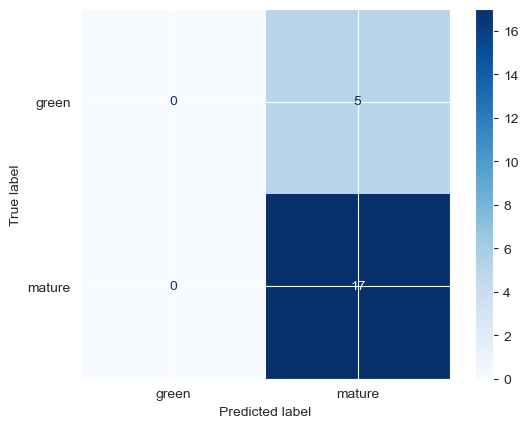

In [51]:
cm = ConfusionMatrixDisplay.from_predictions(y_test, svm_y_pred, display_labels=clf.classes_, cmap='Blues')
cm

# FC instead of FVA data

In [14]:
dataset_file = os.path.join(data_source, 'fluxomics_fc.csv')
metadata_file = os.path.join(data_source, 'GSE98923_metadata.xlsx')

In [17]:
metadata = pd.read_excel(metadata_file, index_col=0, sheet_name='NO_REPLICATES')

In [18]:
y_state = metadata['state']
y_cv = metadata['cultivar']

In [28]:
data = pd.read_csv(dataset_file, index_col=0)
data.shape

(8632, 73)

In [29]:
data = data.transpose()
data.shape

(73, 8632)

In [30]:
data = data.fillna(0)
data.shape

(73, 8632)

In [21]:
vt = VarianceThreshold(0)
data_filtered = vt.fit_transform(data)
cols_inds = vt.get_support(indices=True)
df_data_filtered = pd.DataFrame(data_filtered, index=data.index, columns=data.columns[cols_inds])
df_data_filtered.shape

(73, 2322)

In [22]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_data_filtered)
df_data_scaled = pd.DataFrame(data_scaled, columns=df_data_filtered.columns,
                              index=df_data_filtered.index)
df_data_scaled.shape

(73, 2322)

In [23]:
df_tsne = run_tsne(n_components=2, data=df_data_scaled)

In [24]:
df_tsne['factor'] = y_state

C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

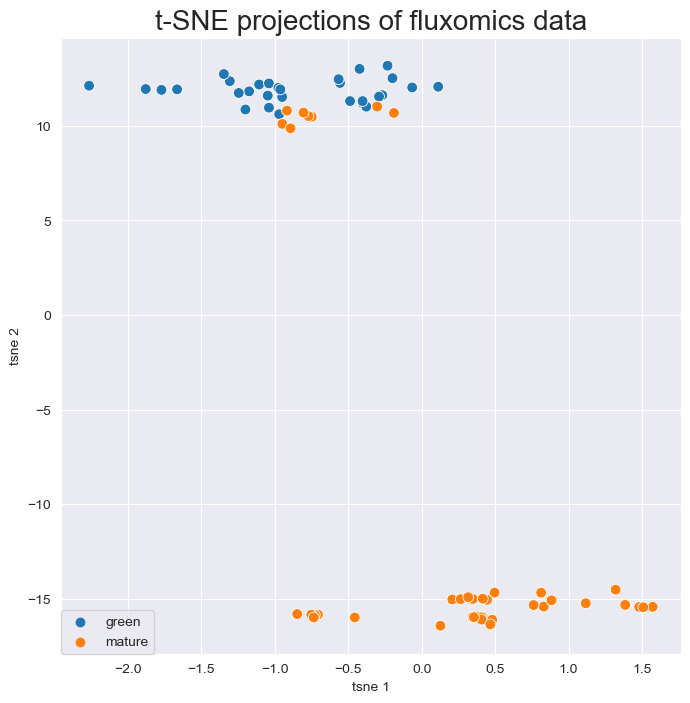

In [26]:
plot_tsne(data=df_tsne, name_fig='tsne_fluxes_state_fc', title='t-SNE projections of fluxomics data')

In [29]:
df_tsne['factor'] = y_cv

C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

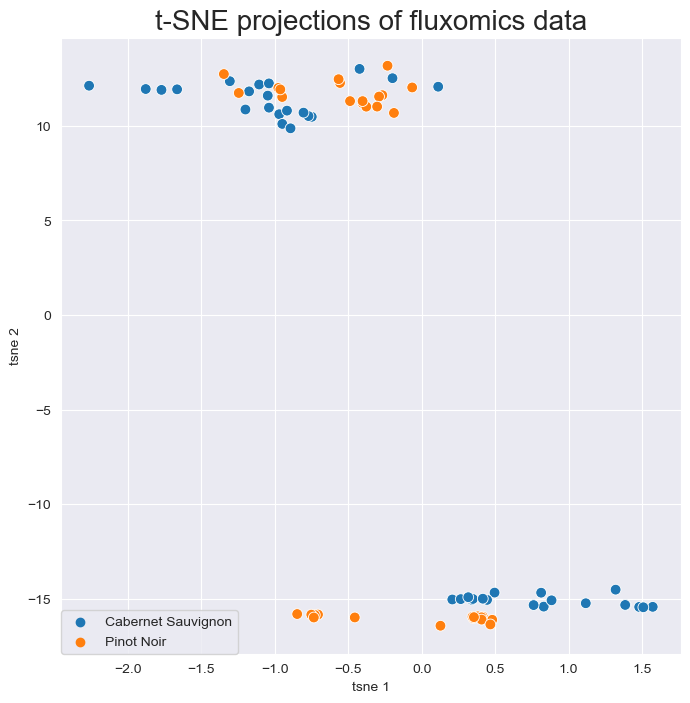

In [30]:
plot_tsne(data=df_tsne, name_fig='tsne_fluxes_cv_fc', title='t-SNE projections of fluxomics data')

In [4]:
Xtrain_RNAseq = pd.read_csv(os.path.join('C:/Users/BiSBII/Documents/MM_ML/data', 'DIABLO_INPUT', 'XTRAIN_RNASEQ_MODEL_500_GENES_NOREPS.csv'), index_col=0)

In [34]:
Xtrain_fluxes = data.loc[Xtrain_RNAseq.index, :]
Xtrain_fluxes.shape

(58, 8632)

In [5]:
Xtest_RNAseq = pd.read_csv(os.path.join('C:/Users/BiSBII/Documents/MM_ML/data', 'DIABLO_INPUT', 'XTEST_RNASEQ_MODEL_500_GENES_NOREPS.csv'), index_col=0)

In [36]:
Xtest_fluxes = data.loc[Xtest_RNAseq.index, :]

In [37]:
Xtrain_fluxes.shape

(58, 8632)

In [38]:
y_train = y_state[Xtrain_RNAseq.index]
y_train.shape

(58,)

In [39]:
y_test = y_state[Xtest_RNAseq.index]
y_test.shape

(15,)

In [41]:
# remove some features
vt = VarianceThreshold(0.1)
filter_train = vt.fit(Xtrain_fluxes)

train_filtered = filter_train.transform(Xtrain_fluxes)
test_filtered = filter_train.transform(Xtest_fluxes)

cols_inds = vt.get_support(indices=True)

X_train_filtered = pd.DataFrame(train_filtered, index=Xtrain_fluxes.index, columns=Xtrain_fluxes.columns[cols_inds])
X_train_filtered.shape

(58, 716)

In [42]:
X_test_filtered = pd.DataFrame(test_filtered, index=Xtest_fluxes.index, columns=Xtest_fluxes.columns[cols_inds])
X_test_filtered.shape

(15, 716)

In [43]:
from sklearn.feature_selection import SelectKBest, f_classif

In [44]:
kb2 = SelectKBest(f_classif, k=500)

kb2_fit = kb2.fit(X_train_filtered, y_train)

train_filtered2 = kb2_fit.transform(X_train_filtered)
test_filtered2 = kb2_fit.transform(X_test_filtered)

cols_inds = kb2_fit.get_support(indices=True)

X_train_filtered2 = pd.DataFrame(train_filtered2, columns=X_train_filtered.columns[cols_inds], index=X_train_filtered.index)
X_train_filtered2.shape

(58, 500)

In [45]:
X_test_filtered2 = pd.DataFrame(test_filtered2, columns=X_test_filtered.columns[cols_inds], index=X_test_filtered.index)
X_test_filtered2.shape

(15, 500)

In [46]:
scaler_model = StandardScaler().fit(X_train_filtered2)
X_train_scaled = scaler_model.transform(X_train_filtered2)
X_test_scaled = scaler_model.transform(X_test_filtered2)

In [47]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_filtered2.columns, index=X_train_filtered2.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_filtered2.columns, index=X_test_filtered2.index)

In [47]:
X_train_scaled_df.shape

(58, 500)

In [48]:
X_test_scaled_df.shape

(15, 500)

In [30]:
X_train_scaled_df.to_csv(os.path.join(data_source, 'XTRAIN_FLUXOMICS_500_REACTIONS.csv'))

In [31]:
X_test_scaled_df.to_csv(os.path.join(data_source, 'XTEST_FLUXOMICS_500_REACTIONS.csv'))

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

In [50]:
clf = LogisticRegression(random_state=0).fit(X_train_scaled_df, y_train)
y_pred = clf.predict(X_test_scaled_df)

print('Precision: %0.2f' % precision_score(y_test, y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, y_pred))

Precision: 0.94
Recall: 0.93
Accuracy: 0.93


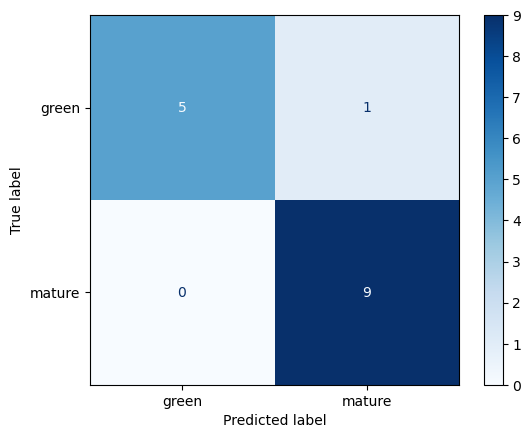

In [51]:
knn_cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=clf.classes_, cmap='Blues')
knn_cm

In [52]:
coefs = clf.coef_
feature_importance = pd.DataFrame(coefs.transpose(), index=X_train_scaled_df.columns, columns=['coef'])
feature_importance['mean_coef'] = abs(feature_importance).mean(axis=1)
feature_importance.sort_values(by=['mean_coef'], ascending=False)

,coef,mean_coef
2.4.1.67-RXN__cyto_reverse,0.414718,0.414718
2.4.1.67-RXN__cyto,0.414718,0.414718
GLY3KIN-RXN__cyto,-0.366632,0.366632
RXN-15513__cyto_reverse,0.220581,0.220581
RXN-15513__chlo_reverse,0.220581,0.220581
...,...,...
UDPKIN-RXN__cyto,0.000445,0.000445
UDPKIN-RXN__mito,0.000445,0.000445
UDPKIN-RXN__chlo,0.000445,0.000445
CDPKIN-RXN__mito,0.000445,0.000445


In [53]:
from sklearn import svm

In [54]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train_scaled_df, y_train)

svm_y_pred = svm_model.predict(X_test_scaled_df)

print('PECC (Accuracy): %0.2f' % svm_model.score(X_test_scaled_df, y_test))

print('Precision: %0.2f' % precision_score(y_test, svm_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, svm_y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, svm_y_pred))

PECC (Accuracy): 0.93
Precision: 0.94
Recall: 0.93
Accuracy: 0.93


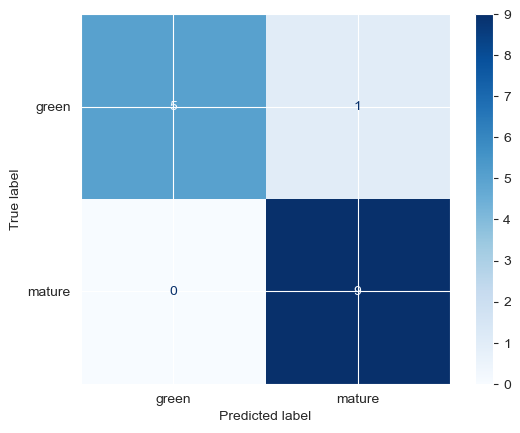

In [64]:
svm_cm = ConfusionMatrixDisplay.from_predictions(y_test, svm_y_pred, display_labels=svm_model.classes_, cmap='Blues')
svm_cm

In [55]:
coefs = svm_model.coef_
feature_importance = pd.DataFrame(coefs.transpose(), index=X_train_scaled_df.columns, columns=['coef'])
feature_importance['mean_coef'] = abs(feature_importance).mean(axis=1)
feature_importance.sort_values(by=['mean_coef'], ascending=False)

,coef,mean_coef
2.4.1.67-RXN__cyto_reverse,0.176932,0.176932
2.4.1.67-RXN__cyto,0.176932,0.176932
GLY3KIN-RXN__cyto,-0.140817,0.140817
RXN-15513__cyto_reverse,0.086552,0.086552
RXN-15513__chlo_reverse,0.086552,0.086552
...,...,...
1.1.1.39-RXN__mito,-0.000179,0.000179
PEPDEPHOS-RXN__cyto,-0.000176,0.000176
PEPDEPHOS-RXN__chlo,-0.000176,0.000176
MALIC-NADP-RXN__chlo,-0.000176,0.000176


In [56]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_scaled_df, y_train)

rf_y_pred = rf_model.predict(X_test_scaled_df)

print('Precision: %0.2f' % precision_score(y_test, rf_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, rf_y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, rf_y_pred))

Precision: 0.94
Recall: 0.93
Accuracy: 0.93


In [59]:
importances = rf_model.feature_importances_
importances_df = pd.DataFrame(importances, columns=['importance'], index=X_train_scaled_df.columns)
importances_df.sort_values(by=['importance'], ascending=False)

,importance
THRESYN-RXN__chlo,0.036914
GLY3KIN-RXN__chlo,0.031477
RXN-8092__cyto,0.031068
TO0011677__cyto__extr,0.030291
RXN-18359__cyto,0.025955
...,...
RIBOFLAVINKIN-RXN__cyto,0.000000
RIBOFLAVINKIN-RXN__chlo,0.000000
PHOSPHOENOLPYRUVATE-PHOSPHATASE-RXN__cyto,0.000000
RXN0-5462__cyto,0.000000


# SAMPLING DATA FOR DFA

In [6]:
import os
import pandas as pd
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
DATAPATH = 'C:/Users/BiSBII/Documents/plantdb/reconstruction_results/vvinif2023/results_troppo/ALL_BERRY/'
MODELPATH = os.path.join(DATAPATH, 'reconstructed_models')
SAMPLING = os.path.join(DATAPATH, 'dfa')

In [8]:
sampling_file_final = os.path.join(SAMPLING, 'all_sampling.csv')
df_sampling_final = pd.read_csv(sampling_file_final, index_col=0) 
# df_sampling_final = df_sampling_final.iloc[:, 1:] # first column is the index but has same index values for different rows
df_sampling_final.shape

(66130, 8033)

In [9]:
to_keep = [reaction for reaction in df_sampling_final.columns if not reaction.startswith('EX_')]
df_sampling_final = df_sampling_final.loc[:, to_keep]
df_sampling_final.shape

(66130, 6136)

In [10]:
df_sampling_final.index

Index(['CS_time0_2012_0', 'CS_time0_2012_1', 'CS_time0_2012_2',
       'CS_time0_2012_3', 'CS_time0_2012_4', 'CS_time0_2012_5',
       'CS_time0_2012_6', 'CS_time0_2012_7', 'CS_time0_2012_8',
       'CS_time0_2012_9',
       ...
       'PN_time9_2013_992', 'PN_time9_2013_993', 'PN_time9_2013_994',
       'PN_time9_2013_995', 'PN_time9_2013_996', 'PN_time9_2013_997',
       'PN_time9_2013_998', 'PN_time9_2013_999', 'PN_time9_2013_1000',
       'PN_time9_2013_1001'],
      dtype='object', length=66130)

In [22]:
names = ['_'.join(x.split('_')[:-1]) for x in list(df_sampling_final.index)]

y = metadata.loc[names, 'state']
y

MEAN SAMPLES
CS_time0_2012     green
CS_time0_2012     green
CS_time0_2012     green
CS_time0_2012     green
CS_time0_2012     green
                  ...  
PN_time9_2013    mature
PN_time9_2013    mature
PN_time9_2013    mature
PN_time9_2013    mature
PN_time9_2013    mature
Name: state, Length: 66130, dtype: object

In [26]:
y.index = df_sampling_final.index
y

CS_time0_2012_0        green
CS_time0_2012_1        green
CS_time0_2012_2        green
CS_time0_2012_3        green
CS_time0_2012_4        green
                       ...  
PN_time9_2013_997     mature
PN_time9_2013_998     mature
PN_time9_2013_999     mature
PN_time9_2013_1000    mature
PN_time9_2013_1001    mature
Name: state, Length: 66130, dtype: object

In [24]:
y_cv = []
for ind in df_sampling_final.index:
    if ind.startswith('CS'):
        y_cv.append('CS')
    else:
        y_cv.append('PN')

In [27]:
vt = VarianceThreshold(0)
data_filtered = vt.fit_transform(df_sampling_final)
cols_inds = vt.get_support(indices=True)
df_data_filtered = pd.DataFrame(data_filtered, index=df_sampling_final.index, columns=df_sampling_final.columns[cols_inds])
df_data_filtered.shape

(66130, 4191)

In [28]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_data_filtered)
df_data_scaled = pd.DataFrame(data_scaled, columns=df_data_filtered.columns,
                              index=df_data_filtered.index)
df_data_scaled.shape

(66130, 4191)

In [ ]:
df_tsne = run_tsne(n_components=2, data=df_data_scaled)

In [30]:
y_state = metadata['state']
y_cv = metadata['cultivar']

In [54]:
df_tsne['factor'] = y['state']

C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

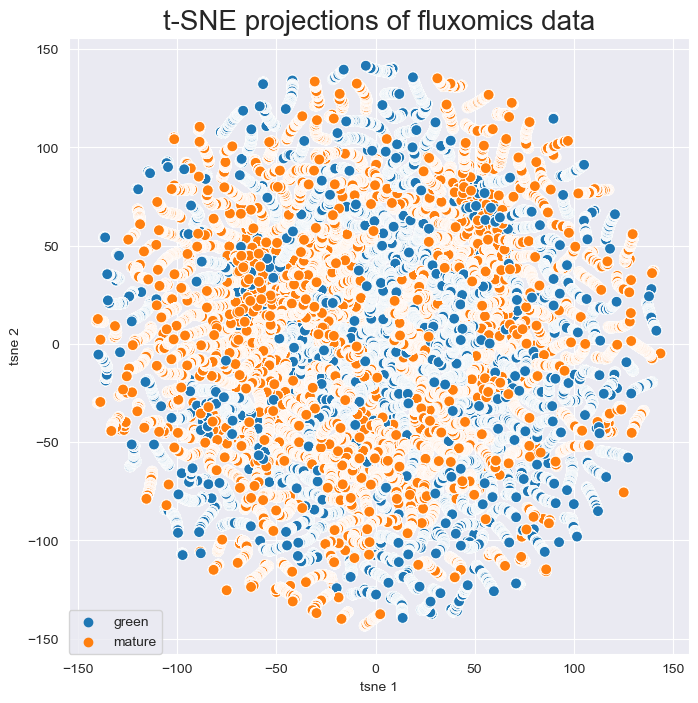

In [55]:
plot_tsne(data=df_tsne, name_fig='tsne_fluxes_state_sampling', title='t-SNE projections of fluxomics data')

In [60]:
df_tsne['factor'] = y_cv

C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

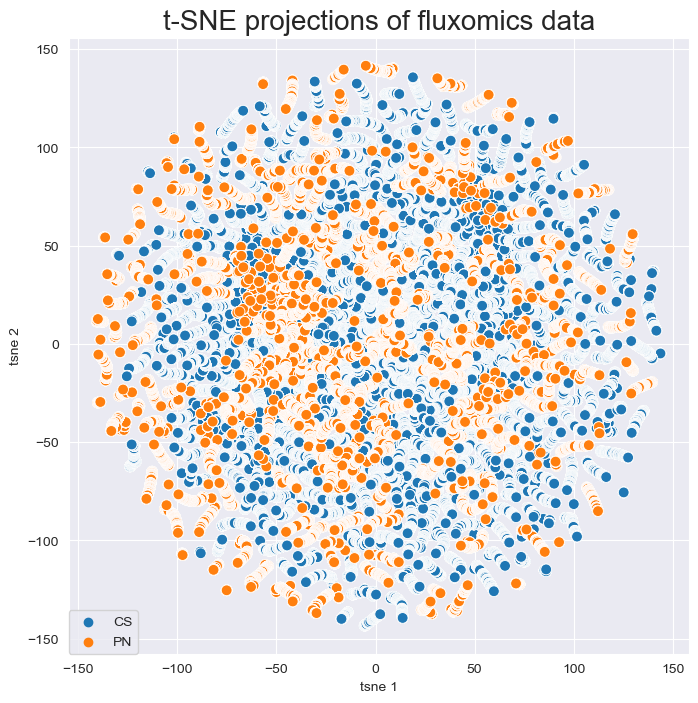

In [61]:
plot_tsne(data=df_tsne, name_fig='tsne_fluxes_cv_sampling', title='t-SNE projections of fluxomics data')

In [28]:
train_index = []
test_index = []
for ind in df_sampling_final.index:
    if '_'.join(ind.split('_')[:-1]) in Xtrain_RNAseq.index:
        train_index.append(ind)
    else:
        test_index.append(ind)

In [29]:
len(train_index)

52104

In [30]:
len(test_index)

14026

In [41]:
X_train = df_sampling_final.loc[train_index, :]
X_train.shape

(52104, 6136)

In [42]:
X_test = df_sampling_final.loc[test_index, :]
X_test.shape

(14026, 6136)

In [50]:
y_train = y[train_index]
y_train

CS_time0_2013_0        green
CS_time0_2013_1        green
CS_time0_2013_2        green
CS_time0_2013_3        green
CS_time0_2013_4        green
                       ...  
PN_time9_2013_997     mature
PN_time9_2013_998     mature
PN_time9_2013_999     mature
PN_time9_2013_1000    mature
PN_time9_2013_1001    mature
Name: state, Length: 52104, dtype: object

In [51]:
y_test = y[test_index]
y_test

CS_time0_2012_0        green
CS_time0_2012_1        green
CS_time0_2012_2        green
CS_time0_2012_3        green
CS_time0_2012_4        green
                       ...  
PN_time5_2013_997     mature
PN_time5_2013_998     mature
PN_time5_2013_999     mature
PN_time5_2013_1000    mature
PN_time5_2013_1001    mature
Name: state, Length: 14026, dtype: object

feature selection and scaling to the train dataset and applied to the test one

In [43]:
vt = VarianceThreshold(0.1)
data_filtered = vt.fit_transform(X_train)
cols_inds = vt.get_support(indices=True)
X_train_filtered = pd.DataFrame(data_filtered, index=X_train.index, columns=X_train.columns[cols_inds])
X_train_filtered.shape

(52104, 1467)

In [44]:
X_test_filtered = X_test.loc[:, X_test.columns[cols_inds]]
X_test_filtered.shape

(14026, 1467)

In [47]:
scaler = StandardScaler()
fit_train = scaler.fit(X_train_filtered)
train = fit_train.transform(X_train_filtered)
test = fit_train.transform(X_test_filtered)

X_train_scaled = pd.DataFrame(train, columns=X_train_filtered.columns, index=X_train_filtered.index)
X_test_scaled = pd.DataFrame(test, columns=X_test_filtered.columns, index=X_test_filtered.index)

print(X_train_scaled.shape)
X_test_scaled.shape

(52104, 1467)


(14026, 1467)

In [53]:
y_train.value_counts()

state
mature    30060
green     22044
Name: count, dtype: int64

In [54]:
y_test.value_counts()

state
mature    8016
green     6010
Name: count, dtype: int64

In [55]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

In [56]:
clf = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print('Precision: %0.2f' % precision_score(y_test, y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, y_pred))

C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precision: 0.81
Recall: 0.80
Accuracy: 0.80


In [57]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

svm_y_pred = svm_model.predict(X_test_scaled)

print('PECC (Accuracy): %0.2f' % svm_model.score(X_test_scaled, y_test))

print('Precision: %0.2f' % precision_score(y_test, svm_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, svm_y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, svm_y_pred))

PECC (Accuracy): 0.81
Precision: 0.82
Recall: 0.81
Accuracy: 0.81


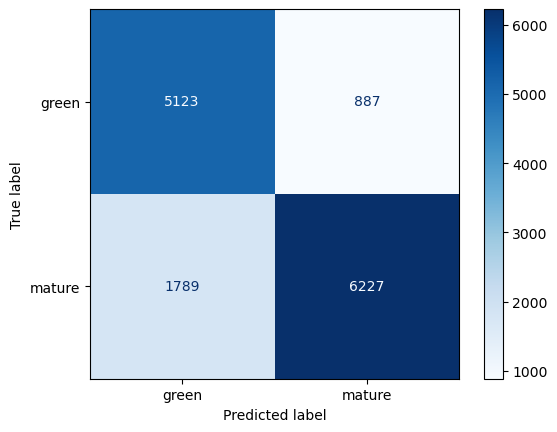

In [58]:
svm_cm = ConfusionMatrixDisplay.from_predictions(y_test, svm_y_pred, display_labels=svm_model.classes_, cmap='Blues')
svm_cm

In [21]:
coefs = svm_model.coef_
feature_importance = pd.DataFrame(coefs.transpose(), index=X_train_scaled.columns, columns=['coef'])
feature_importance['mean_coef'] = abs(feature_importance).mean(axis=1)
feature_importance.sort_values(by=['mean_coef'], ascending=False)

,coef,mean_coef
TO0011677__cyto__extr,-0.077370,0.077370
T_Triacylglycerols__cyto,0.077370,0.077370
TO0011423__cyto__extr,-0.076074,0.076074
T_DIACYLGLYCEROL__cyto,0.076074,0.076074
TO0003845__vacu__cyto,-0.068503,0.068503
...,...,...
TI3000489__chlo__cyto,-0.000044,0.000044
TI1000132__vacu__cyto,-0.000044,0.000044
DCDPKIN-RXN__mito,0.000037,0.000037
T_ACETYL-COA__chlo,0.000036,0.000036


In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

rf_y_pred = rf_model.predict(X_test_scaled)

print('Precision: %0.2f' % precision_score(y_test, rf_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, rf_y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, rf_y_pred))

Precision: 0.92
Recall: 0.91
Accuracy: 0.91


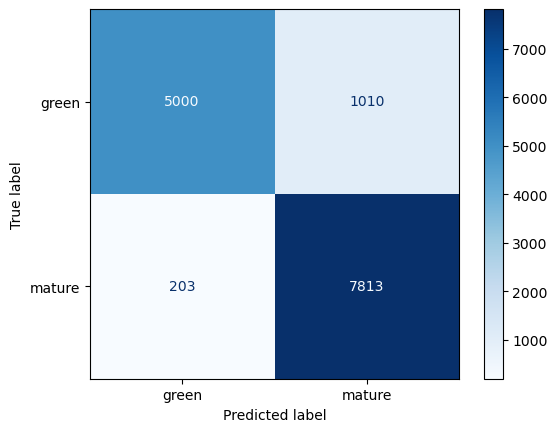

In [61]:
rf_cm = ConfusionMatrixDisplay.from_predictions(y_test, rf_y_pred, display_labels=rf_model.classes_, cmap='Blues')

In [62]:
importances = rf_model.feature_importances_
importances_df = pd.DataFrame(importances, columns=['importance'], index=X_train_scaled.columns)
importances_df.sort_values(by=['importance'], ascending=False)

,importance
RXN-8092__cyto,0.071882
T_DIACYLGLYCEROL__cyto,0.050476
TO0011677__cyto__extr,0.044202
1.18.1.2-RXN__chlo,0.028162
THREONINE-ALDOLASE-RXN__cyto,0.027834
...,...
RXN-8730__cyto,0.000000
TR2900012__er__cyto,0.000000
ASNSYNA-RXN__cyto,0.000000
TI3002559__cyto__extr,0.000000
